# Semana 5

## FSC5705 - Física Computacional
## 10/04/2024

### Atenção
- **Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

### Ponto lagrangiano interno

Existe um ponto entre a Terra e a Lua, chamado *Ponto lagrangiano* $L_1$, onde um satélite orbita a Terra em perfeita sincronia com a Lua, permanecendo exatamente entre as duas. Isso acontece porque as atrações gravitacionais da Terra e da Lua se combinam para criar exatamente a aceleração centrípeta necessária para um movimento circular com mesmo período do da Lua. Considere a figura abaixo.

[Mark Newman, Computational Physics](http://www-personal.umich.edu/~mejn/cp/)

![Local do ponto Lagrangeano L1 no sistema Terra-Lua.](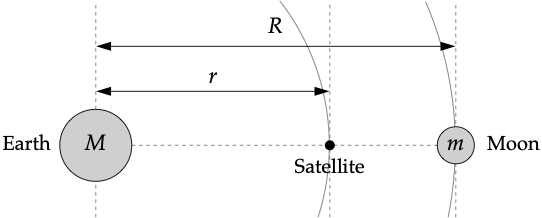
)

Vamos supor órbitas circulares e coplanares, com a Terra muito mais massiva que a Lua e o satélite (Terra parada no centro das órbitas). A distância $r$ do centro da Terra até o ponto $L_1$, neste caso, é dada pela equação

$$
\frac{GM}{r^2} - \frac{Gm}{(R - r)^2} = \omega^2 r,
$$

onde $\omega$ é a velocidade angular do movimento circular.

Podemos calcular facilmente $\omega$ considerando apenas o movimento da Lua. Se a sua aceleração centrípeta é devida à aceleração da gravidade,

\begin{align}
\omega^2 R &= \frac{GM}{R^2} \\
\omega^2 &= \frac{GM}{R^3}.
\end{align}

**a.** Queremos encontrar $r$ que satisfaz a equação acima. Expresse a equação de forma a poder aplicar o método de Newton. Lembre que vai ser necessário calcular a derivada da função, então capriche nas simplificações! Quantidades envolvidas:

- $G = 6.67430 \times 10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-1}$
- $R = 3.844 \times 10^8\,\mathrm{m}$
- $M = 5.972168 \times 10^{24}\,\mathrm{kg}$
- $m = 7.342 \times 10^{22}\,\mathrm{kg}$

Faça o gráfico da função, e verifique se a solução existe.

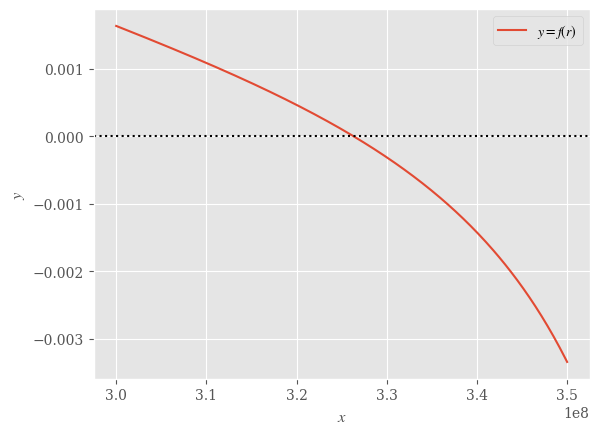

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11 #m^3 kg^-1 s^-1
R = 3.844e8 #m
M = 5.972168e24 #kg
m = 7.342e22 #kg

omega = np.sqrt(G*M/R**3)

def f(r):
    return (G*M/r**2) - (G*m/(R-r)**2) - (r*omega**2)

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

fig, ax = plt.subplots()
r = np.linspace(300e6, 350e6, 300)

ax.plot(r, f(r), label=r'$y = f(r)$')
ax.set_ylabel(r'$y$')
ax.set_xlabel(r'$x$')
ax.axhline(0.0, ls=':', color='k')
ax.legend()
plt.show()

#chutes das raizes ao olhar o grafico:
#x1 = 3.25e8

**b.** Use o método de Newton para encontrar a solução, com uma precisão de pelo menos 4 algarismos significativos. Compare com o valor calculado usando o centro de massa do sistema, $L_1 = 326.39 \times 10^3\,\mathrm{km}$.

In [2]:
#calculando analiticamente f(x)/f'(x), obtemos a seguinte função
eps = 1e5

def df(r):
    return (-2*G*M/r**3) - (2*G*m/(R-r)**3) - (omega**2)

def r(x1, eps):
    for n in range(100):
        x2 = x1 - f(x1)/df(x1)
    
        if (abs(x2 - x1) < eps):
            return x2
        x1 = x2
        
print('O valor encontrado foi de', f'{r(3.25e8, eps):.4e}')

O valor encontrado foi de 3.2633e+08
